# SQUAD Datathon

This is a starter python notebook to get you going! The code shown here is basic and it is expected that you create visualizations much more beautiful than these boring ones :(  
The starter notebook only contains some examples for Exploratory Data Analysis (EDA). To know more about modelling, please look into this library called <a href="https://scikit-learn.org/stable/">scikit-learn</a>.

# Import Libraries

Python is a versatile language because of the various packages created by developers. In this section, data science libraries such as pandas matplotlib and seaborn are imported.  
1. Pandas: Used to work with csv, xlsx, tsv and many more such data files. You can use this library to perform all kinds of operations on data (filter, locate, slice, and much more).  
2. Matplotlib: Used to create all kinds of visualizations.  
3. Seaborn: Same as matplotlib (it is not necessary to use this notebook but I find seaborn quite easy).

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [39]:
# this is how you can comment in python and from here on, you'll mostly see comments in the code
# first step is to read the datasets
train = pd.read_csv("train.csv") # make sure you use the absolute path to the file

train.head() # this is how you print the first 5 rows of the dataset

,sex,age,address,family_size,parents_together,mother_job,father_job,guardian,travel_time,study_time,...,want_higher,internet,romantic_rel,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,grade
0,Female,18,Urban,Greater than 3,Apart,at_home,teacher,mother,25,2,...,yes,no,no,4,3,4,1,1,6,0.30
1,Male,16,Urban,Greater than 3,Together,health,other,father,10,2,...,yes,yes,no,4,2,4,2,4,2,0.65
2,Male,15,Urban,Greater than 3,Together,other,teacher,father,25,2,...,yes,no,no,4,4,3,1,1,2,0.70
3,Male,16,Urban,Less than 3,Together,other,other,mother,10,2,...,yes,yes,yes,4,2,3,1,2,0,0.80
4,Female,17,Urban,Less than 3,Together,services,services,father,10,4,...,yes,yes,yes,3,4,1,1,1,0,0.00


In [40]:
# print all the values of categorical columns
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    unique_values = train[column].unique()
    print(f"Categorical values for '{column}': {unique_values}")



Categorical values for 'sex': ['Female' 'Male']
Categorical values for 'address': ['Urban' 'Rural']
Categorical values for 'family_size': ['Greater than 3' 'Less than 3']
Categorical values for 'parents_together': ['Apart' 'Together']
Categorical values for 'mother_job': ['at_home' 'health' 'other' 'services' 'teacher']
Categorical values for 'father_job': ['teacher' 'other' 'services' 'at_home' 'health']
Categorical values for 'guardian': ['mother' 'father' 'other']
Categorical values for 'school_support': ['yes' 'no']
Categorical values for 'extra_curricular': ['no' 'yes']
Categorical values for 'want_higher': ['yes' 'no']
Categorical values for 'internet': ['no' 'yes']
Categorical values for 'romantic_rel': ['no' 'yes']


In [41]:
# get number of unique values for all object column
train.select_dtypes(include=['object']).nunique()

sex                 2
address             2
family_size         2
parents_together    2
mother_job          5
father_job          5
guardian            3
school_support      2
extra_curricular    2
want_higher         2
internet            2
romantic_rel        2
dtype: int64

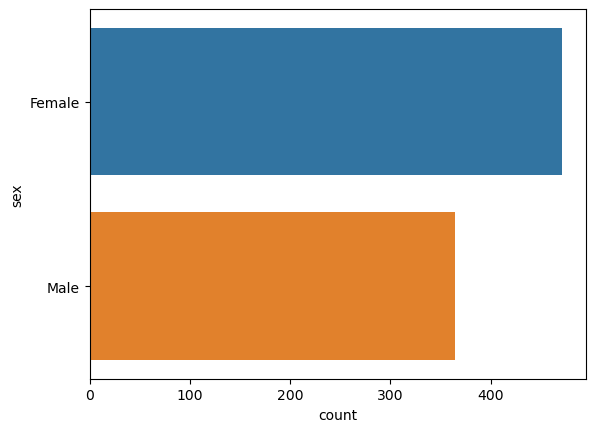

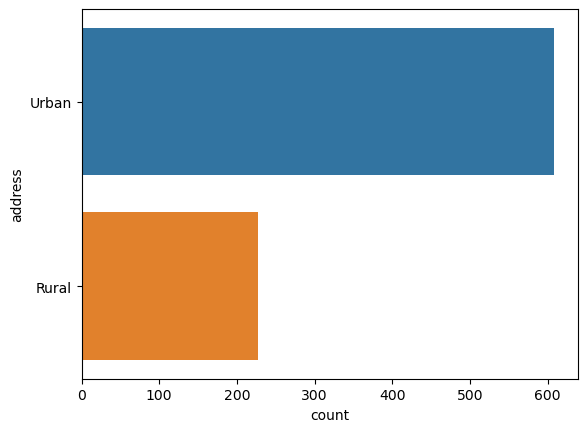

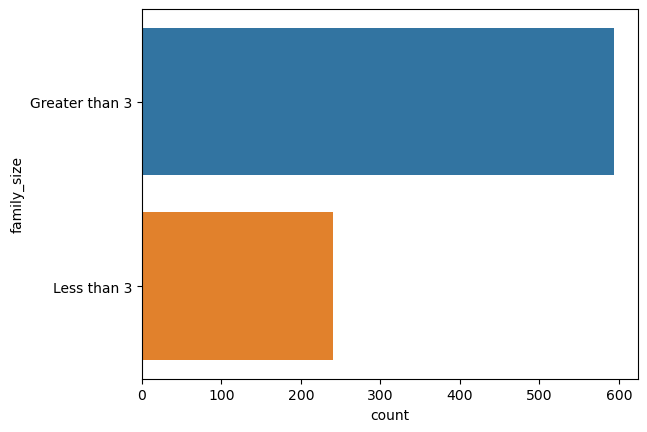

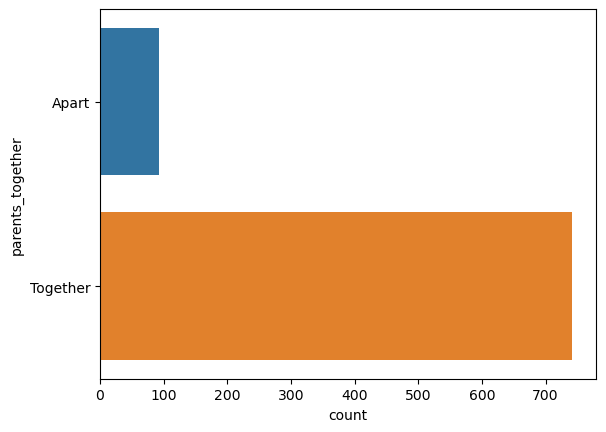

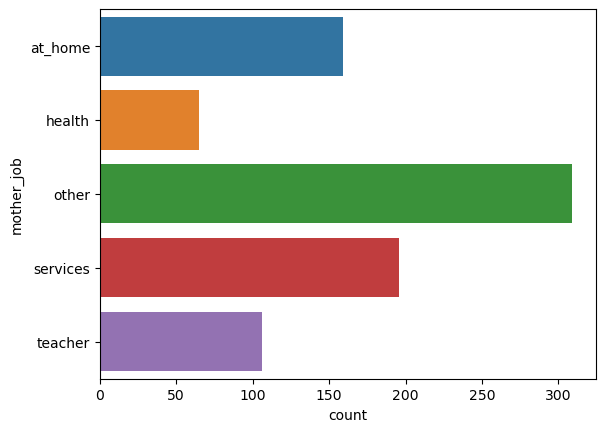

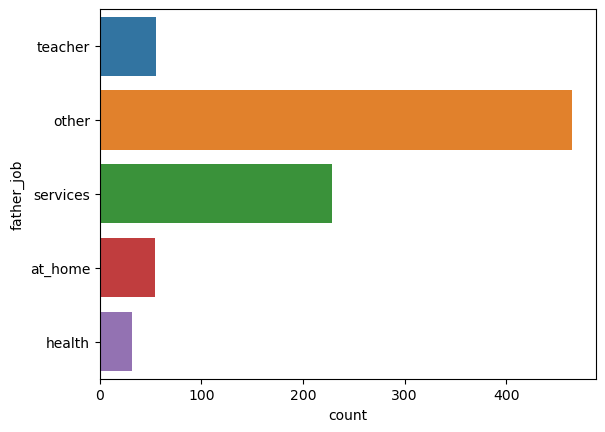

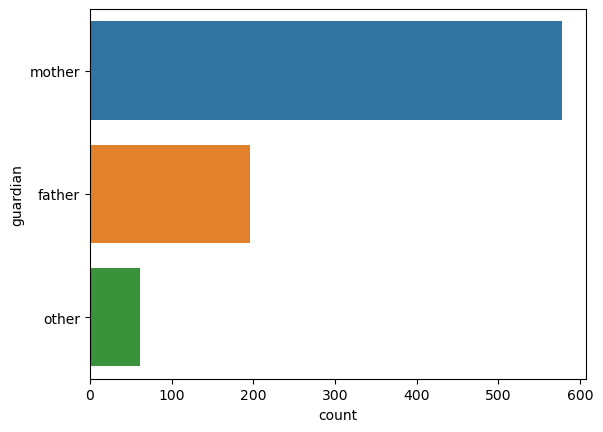

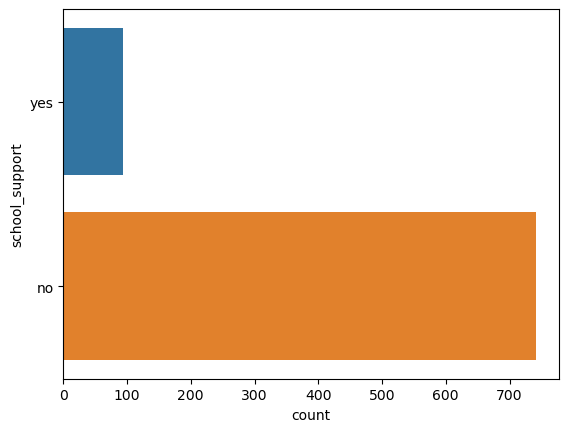

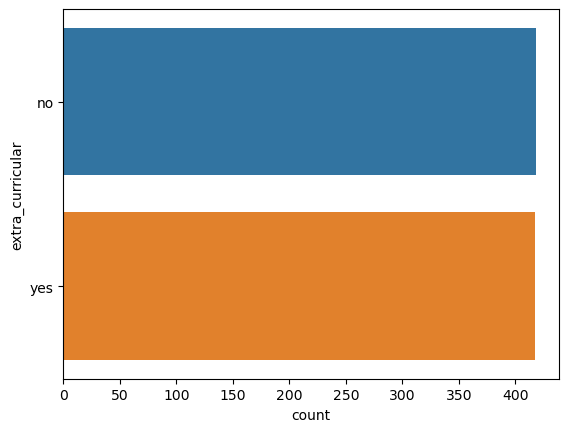

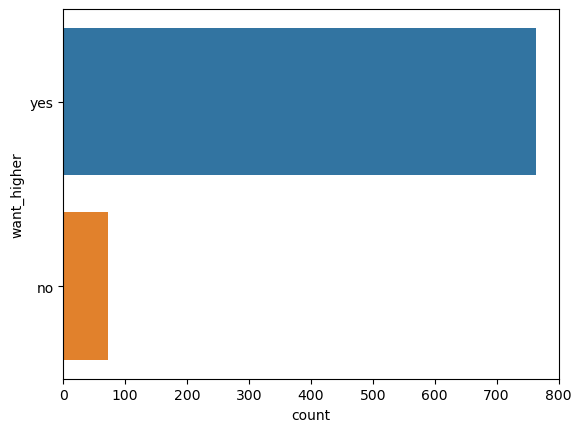

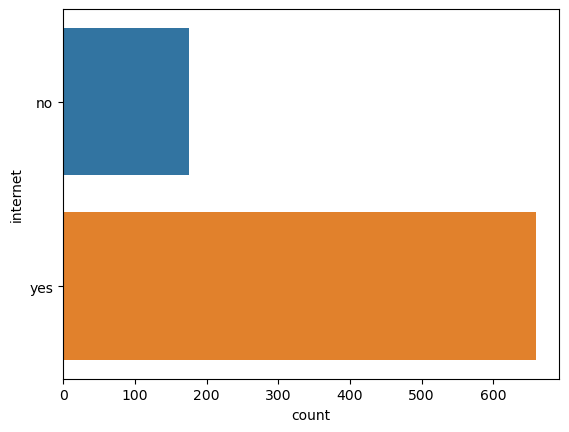

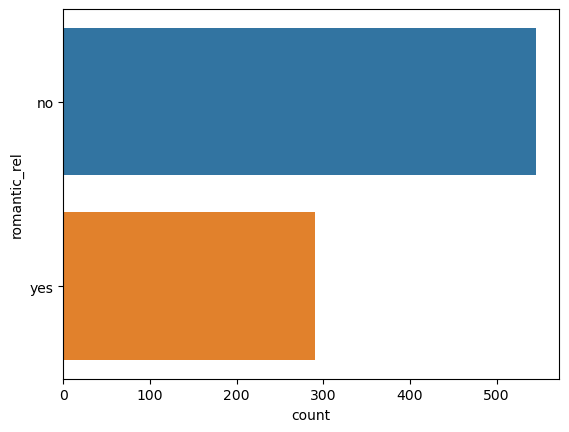

In [42]:
# draw all the numbers of each category value in the dataset
for column in categorical_columns:
    sns.countplot(y=column, data=train)
    plt.show()

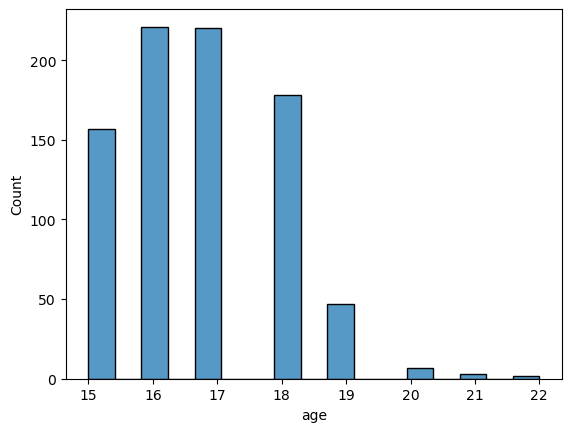

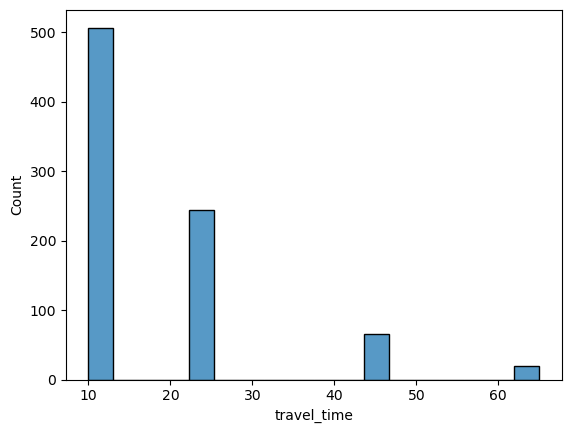

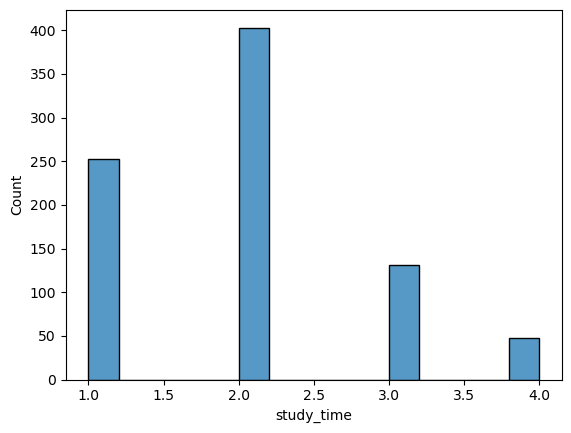

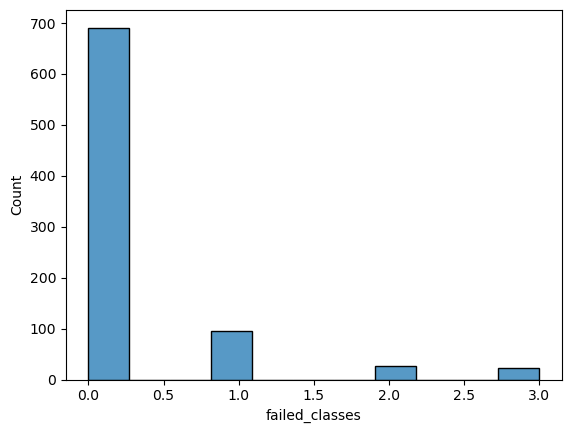

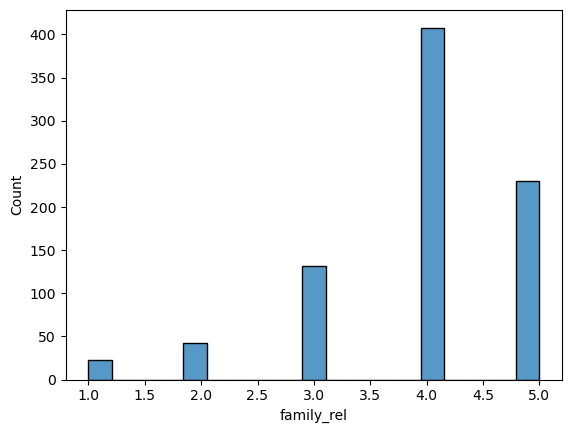

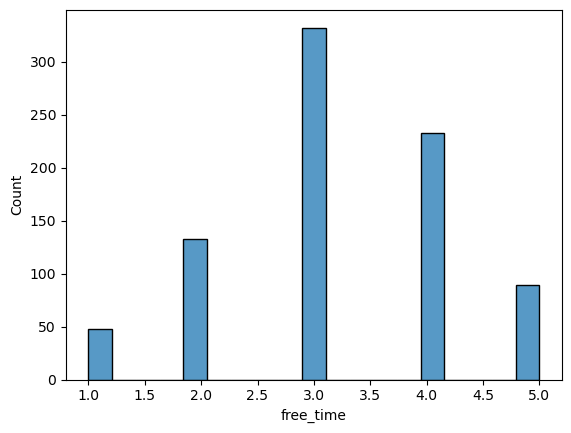

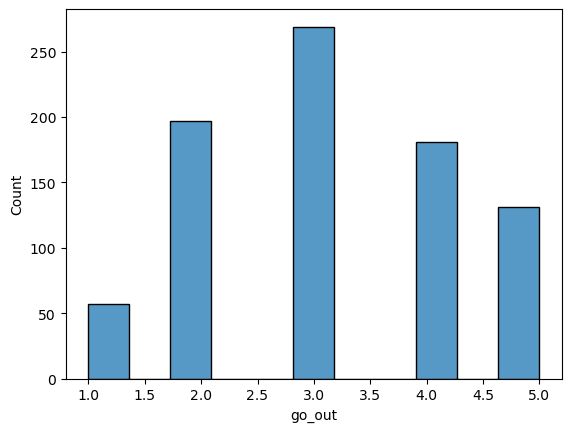

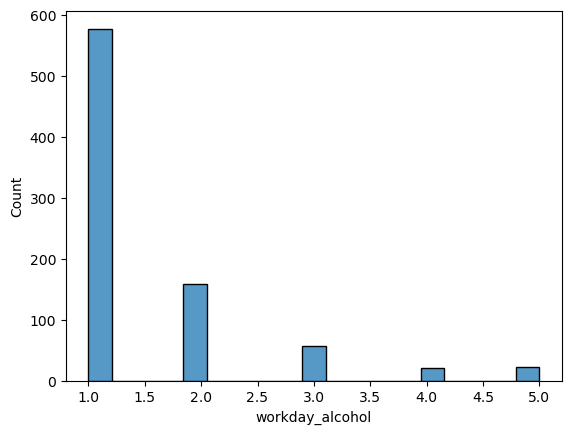

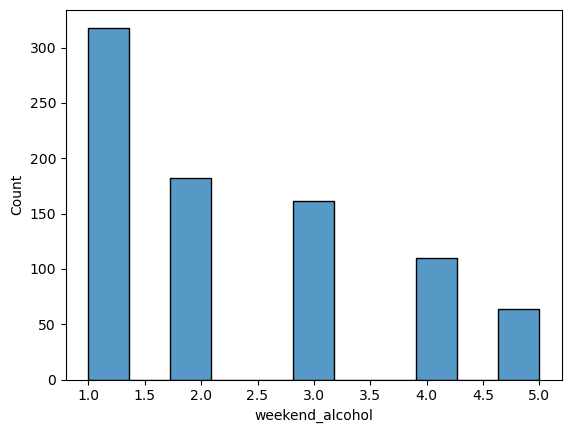

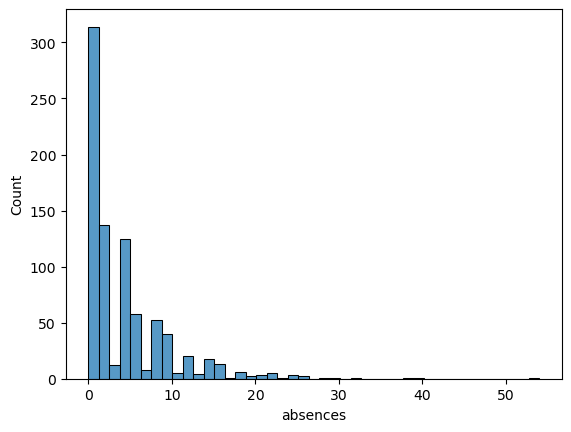

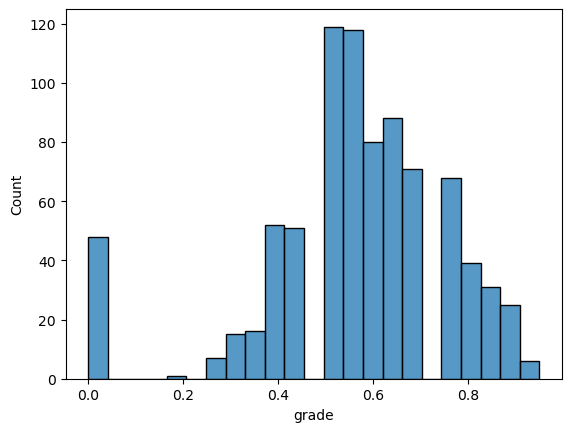

In [43]:
# draw histogram for all numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    sns.histplot(train[column])
    plt.show()

In [27]:
# show all unique values for all object columns
for col in train.select_dtypes(include=['category']).columns:
    print(f'{col} : {train[col].unique()}')

In [23]:
# turn all the binary categorical variables into numerical
train = pd.get_dummies(train)

In [24]:
train

,age,travel_time,study_time,failed_classes,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,...,school_support_no,school_support_yes,extra_curricular_no,extra_curricular_yes,want_higher_no,want_higher_yes,internet_no,internet_yes,romantic_rel_no,romantic_rel_yes
0,18,25,2,0,4,3,4,1,1,6,...,False,True,True,False,False,True,True,False,True,False
1,16,10,2,0,4,2,4,2,4,2,...,True,False,False,True,False,True,False,True,True,False
2,15,25,2,0,4,4,3,1,1,2,...,True,False,False,True,False,True,True,False,True,False
3,16,10,2,0,4,2,3,1,2,0,...,True,False,False,True,False,True,False,True,False,True
4,17,10,4,0,3,4,1,1,1,0,...,True,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,17,25,1,3,4,5,1,1,1,2,...,False,True,False,True,True,False,False,True,True,False
831,15,10,3,0,5,3,2,1,2,2,...,False,True,True,False,False,True,False,True,True,False
832,16,25,2,0,1,2,4,2,2,8,...,True,False,False,True,False,True,False,True,True,False
833,17,10,3,0,4,3,2,1,2,10,...,True,False,False,True,False,True,False,True,False,True


In [21]:
# check nan values
train.isnull().sum()

sex                 0
age                 0
address             0
family_size         0
parents_together    0
mother_job          0
father_job          0
guardian            0
travel_time         0
study_time          0
failed_classes      0
school_support      0
extra_curricular    0
want_higher         0
internet            0
romantic_rel        0
family_rel          0
free_time           0
go_out              0
workday_alcohol     0
weekend_alcohol     0
absences            0
grade               0
dtype: int64

In [11]:
# convert object columns with less than 10 unique values to category

for col in train.select_dtypes(include=['object']).columns:
    if train[col].nunique() < 10:
        train[col] = train[col].astype('category')

In [12]:
train.info() # this is how you print the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sex               835 non-null    category
 1   age               835 non-null    int64   
 2   address           835 non-null    category
 3   family_size       835 non-null    category
 4   parents_together  835 non-null    category
 5   mother_job        835 non-null    category
 6   father_job        835 non-null    category
 7   guardian          835 non-null    category
 8   travel_time       835 non-null    int64   
 9   study_time        835 non-null    int64   
 10  failed_classes    835 non-null    int64   
 11  school_support    835 non-null    category
 12  extra_curricular  835 non-null    category
 13  want_higher       835 non-null    category
 14  internet          835 non-null    category
 15  romantic_rel      835 non-null    category
 16  family_rel        835 non-

Dataset info can help identify categorical and numerical variables. Let's move on to some plots.  
Note: Since you'll be saving your plots for the presentation, you can save them using plt.savefig() but remember to use it before plt.show().

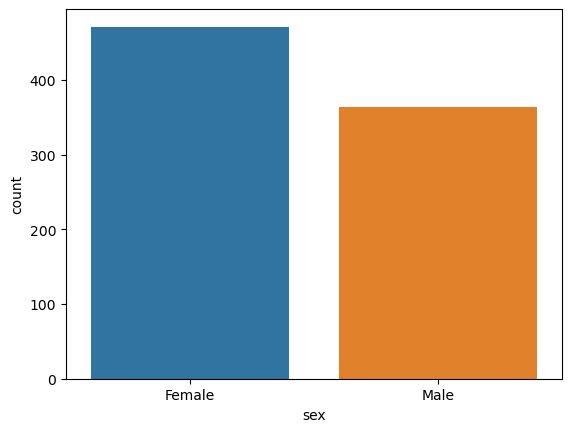

In [13]:
# categorical variable 
sns.countplot(x="sex", data=train) # this is how you plot a bar chart for a categorical variable
plt.show() # this is important to show the plot

Great! We have a basic count plot (or a bar chart) for our categorical variable. It is suggested that you go through seaborn's documentation since tweaking some parameters above can help you accommodate another categorical variable as additional information in this chart! 

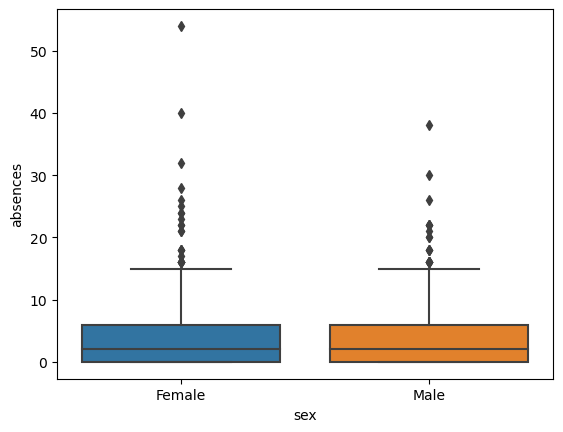

In [14]:
# categorical and continuous variable
sns.boxplot(x="sex", y="absences", data=train) # this is how you create a box plot
plt.show() # this is important to show the plot

Don't mind package warnings, library devs will fix them! Boxplots contain important information that can be useful for data cleaning. These two plots should give you a lot of insights, but to win, it is recommended that you go through matplotlib and seaborn documentation and try various plots.

In [15]:
# Using pandas, you can filter data
train[train["sex"] == "Male"] # this is how you filter data. You can also look into "and" and "or" operators.

,sex,age,address,family_size,parents_together,mother_job,father_job,guardian,travel_time,study_time,...,want_higher,internet,romantic_rel,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,grade
1,Male,16,Urban,Greater than 3,Together,health,other,father,10,2,...,yes,yes,no,4,2,4,2,4,2,0.65
2,Male,15,Urban,Greater than 3,Together,other,teacher,father,25,2,...,yes,no,no,4,4,3,1,1,2,0.70
3,Male,16,Urban,Less than 3,Together,other,other,mother,10,2,...,yes,yes,yes,4,2,3,1,2,0,0.80
10,Male,17,Urban,Less than 3,Apart,other,other,mother,10,1,...,yes,no,yes,4,1,2,1,1,4,0.60
12,Male,17,Rural,Less than 3,Apart,teacher,other,mother,25,2,...,yes,yes,no,3,3,3,2,3,2,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,Male,16,Urban,Greater than 3,Together,teacher,teacher,mother,10,1,...,no,yes,yes,3,3,2,2,1,0,0.00
821,Male,18,Urban,Greater than 3,Together,services,other,mother,25,1,...,no,yes,no,4,4,5,2,4,8,0.35
823,Male,19,Urban,Greater than 3,Together,other,services,other,10,2,...,yes,yes,no,4,5,2,2,2,3,0.55
830,Male,17,Urban,Greater than 3,Together,other,other,mother,25,1,...,no,yes,no,4,5,1,1,1,2,0.50


In [22]:
# ranking the affect of all columns on grades column
train.corr()["grades"].sort_values() # this is how you can rank the affect of all columns on a specific column


ValueError: could not convert string to float: 'no'

In [19]:
# perform anova test on the dataset
from scipy import stats

anova = []
for col in train.select_dtypes(include=['category']).columns:
    categories = train[col].cat.categories
    samples = [train[train[col] == category]["grade"] for category in categories]
    f_val, p_val = stats.f_oneway(*samples)
    anova.append((col, f_val, p_val))
anova

[('sex', 2.0971049198024643, 0.14795461277712807),
 ('address', 9.0163662650034, 0.002755711007905752),
 ('family_size', 4.063681757413382, 0.044135505850691335),
 ('parents_together', 2.728280168897507, 0.09896227579686365),
 ('mother_job', 5.979190809337038, 9.574972133131623e-05),
 ('father_job', 2.3796337256297218, 0.05024784068226205),
 ('guardian', 4.159765946047274, 0.015937094520045977),
 ('school_support', 6.033724211725293, 0.014238161544326132),
 ('extra_curricular', 1.8819325890302723, 0.17048400597703867),
 ('want_higher', 46.740758482718064, 1.566392085964104e-11),
 ('internet', 8.681976895475264, 0.0033033295543455194),
 ('romantic_rel', 6.484503439657208, 0.011060812014807865)]

# Additional tips

1. Identify categorical and numerical data correctly.  
2. Creating plots can be easy, but study the plots carefully to derive presentable insights. 
3. Identify the best method to show what information you want to convey and then apply it.
3. Preprocess data using any of the various encoding and scaling methods before applying a model to predict the grade. Hint: Preprocessing a lot of columns can require a lot of different encoders! Maybe scikit-learn has something that can process all columns ;)
4. When modelling, remember to use cross validation.  
5. You can always go back to data preprocessing and EDA if the model doesn't perform well.  
6. Models can sometimes require hyperparameter optimization to perform well.  

Great, you're all set to go! 